In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data=pd.read_csv("D:/MiniProyectos_Python/Titanic/dataset/titanic.csv")
data_main=data.copy()

In [5]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape[1]

12

In [8]:
n=data.shape[0]

# Descripción de los datos

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__Valores Nulos__

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data.Cabin.unique() #Observar los valores unicos de la variable Cabin

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
data.drop("Cabin",axis=True,inplace=True) 


Dado que no se posee informacion sobre el significado de los codigos y tambien por el alto numero de NAs se prefiere prescindir de esta variable

In [13]:
data.Embarked.unique()
#Observar valores únicos de la variable "Embarked"

array(['S', 'C', 'Q', nan], dtype=object)

La variable Embarked en cambio posee solo 3 zonas donde embarcaron los 
pasajeros, por lo cual si puede ser de utilidad. Solo existen dos valores
nulos luego podrán eliminarse directamente o rellenar con most comount 
value

In [20]:
data.Embarked.value_counts()     
#Observar la frecuencia de valores nulos de la variable "Embarked"

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Dado que la variable Embarked es bastante desbalanceada cambiaremos los 
valores nulos por el más comun "S"

In [22]:
data.Embarked.fillna("S",inplace=True)
#Rellenar valores nulos con "S"

__Tipos de datos en cada variable__

In [23]:
#Mostrar valores únicos de cada columna
data.apply(lambda x: pd.Series(pd.unique(x))).fillna('').head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,0,1,PC 17599,71.2833,C
2,3,,2,"Heikkinen, Miss. Laina",,26,3,2,STON/O2. 3101282,7.925,Q
3,4,,,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",,35,4,5,113803,53.1,
4,5,,,"Allen, Mr. William Henry",,,2,3,373450,8.05,


La variable "Passengerid es similar al index, luego también puede eliminarse

La variable "Ticket" y "Name" no aportan información, se elimina.

In [24]:
data.drop(["PassengerId","Ticket","Name"],axis=1, inplace=True)
#Borrar columnas PassengerId, Ticket, Name

In [25]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**_Distribución de los datos_**

__Supervivientes__

0    549
1    342
Name: Survived, dtype: int64

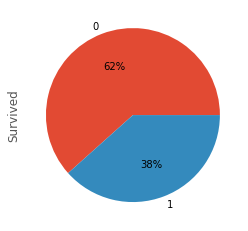

In [42]:
x1=data.Survived
x1.value_counts().plot.pie(autopct='%1.0f%%')
plt.style.use("ggplot")
x1.value_counts()

Sobreviven 342 personas, el 38% de los pasajeros